In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [33]:
pd.set_option('display.max_rows', None)

In [2]:
dataset_path = Path(r"/home/rwth1591/transfer-learning/blue_waters/models-test/captum_test_data.csv")

In [3]:
df = pd.read_csv(Path(r"/home/rwth1591/transfer-learning/blue_waters/models-test/captum_ig_result.csv"))
df_dl = pd.read_csv(Path(r"/home/rwth1591/transfer-learning/blue_waters/models-test/captum_dl_result.csv"))

In [4]:
df_data = pd.read_csv(dataset_path)
df_data = df_data

In [5]:
df.head()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs
0,0,-4.271600,-20.556831,-25.786985,-44.183548,52.206385,2.836451,-60.725564,28.497928,-3.824635,...,8.380020,-19.697800,0.831740,-23.957566,10.144794,3.788402,-1.433156,5.740672,237.053224,-57.398267
1,1,-4.122086,-18.589545,-23.811092,-46.416546,53.830224,1.887347,-61.895654,29.076508,-4.104868,...,-0.386118,-19.651539,1.706680,-24.784120,10.525287,3.564997,-1.596178,6.095845,283.806375,-56.884283
2,2,-4.237340,-20.247843,-25.312947,-45.077500,52.332457,2.534690,-59.411537,29.159933,-3.882117,...,8.435347,-20.488240,0.792024,-21.816708,10.137585,-0.425818,-1.499871,5.720994,237.164609,-57.191344
3,3,-4.384384,-20.168746,-25.729291,-44.570154,54.147248,2.912539,-61.634425,30.418673,-4.073230,...,8.538364,-21.012855,0.930342,-24.324562,10.392473,3.759226,-1.626727,5.994560,286.516425,-50.750999
4,4,-4.511066,-20.477861,-26.020759,-44.553607,53.204036,3.087464,-62.016699,30.394616,-4.012513,...,8.213645,-20.653440,0.867455,-24.632094,10.317714,3.760816,-1.593016,5.910968,284.844629,-54.984428


In [6]:
df_dl.head()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs
0,0,-4.797020,-18.454575,-23.673029,-39.935480,44.835660,3.425595,-66.23291,27.470585,-3.467542,...,6.191204,-18.846350,0.123415,-23.051050,9.270197,3.073978,-1.925436,5.323292,222.85637,-52.259296
1,1,-4.423050,-17.591130,-22.707320,-43.236446,48.570500,2.287774,-67.45301,28.327272,-3.796104,...,-0.312217,-18.895607,1.064265,-23.898443,9.926292,3.036454,-1.926098,5.799265,271.23816,-53.414590
2,2,-4.667705,-18.173490,-23.217554,-41.031883,45.250080,3.056058,-65.06490,28.243114,-3.501702,...,6.357426,-19.464684,0.140731,-20.982946,9.334606,-0.355781,-1.931358,5.325866,223.12909,-52.378800
3,3,-4.774903,-19.240677,-24.647102,-40.971530,48.014545,3.356524,-67.99532,29.621355,-3.693331,...,6.755120,-20.089996,0.148711,-23.428988,9.689496,3.185776,-2.036175,5.655144,271.02700,-47.300735
4,4,-4.901519,-19.333298,-24.767004,-40.773067,46.844790,3.543708,-68.07250,29.537647,-3.647460,...,6.383811,-19.739199,0.076011,-23.637630,9.596021,3.173776,-2.002292,5.559862,268.76657,-50.988030


In [16]:
df_diff = df_dl - df
df_diff.describe().transpose()#.abs().sort_values(ascending=False).head(20)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,137208.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
POSIX_OPENS,137208.0,4.219680,10.831064,-438.553495,-0.447551,4.725094,9.679144,285.895186
POSIX_FILENOS,137208.0,-0.972409,3.094478,-45.104138,-1.586009,-0.205896,0.172358,136.435371
POSIX_DUPS,137208.0,-0.843059,2.700958,-52.436651,-1.516307,-0.207146,0.206408,133.023916
POSIX_READS,137208.0,-1.460557,4.078349,-76.011592,-1.913475,-0.349579,0.382018,17.353928
POSIX_WRITES,137208.0,0.051844,1.457420,-64.065884,-0.177293,0.265562,0.983082,16.202218
POSIX_SEEKS,137208.0,-1.529897,5.854164,-54.353952,-0.533868,0.204885,1.117957,22.411801
POSIX_STATS,137208.0,7.445131,15.443200,-263.807855,-0.267650,9.155455,17.039179,273.164395
POSIX_MMAPS,137208.0,-0.330120,2.299571,-17.813165,-0.581424,-0.331066,-0.119659,321.719056
POSIX_FSYNCS,137208.0,-0.073056,1.030496,-62.649053,-0.086378,-0.060400,-0.026484,59.631322


**Attention: std sensitive to outliers?**

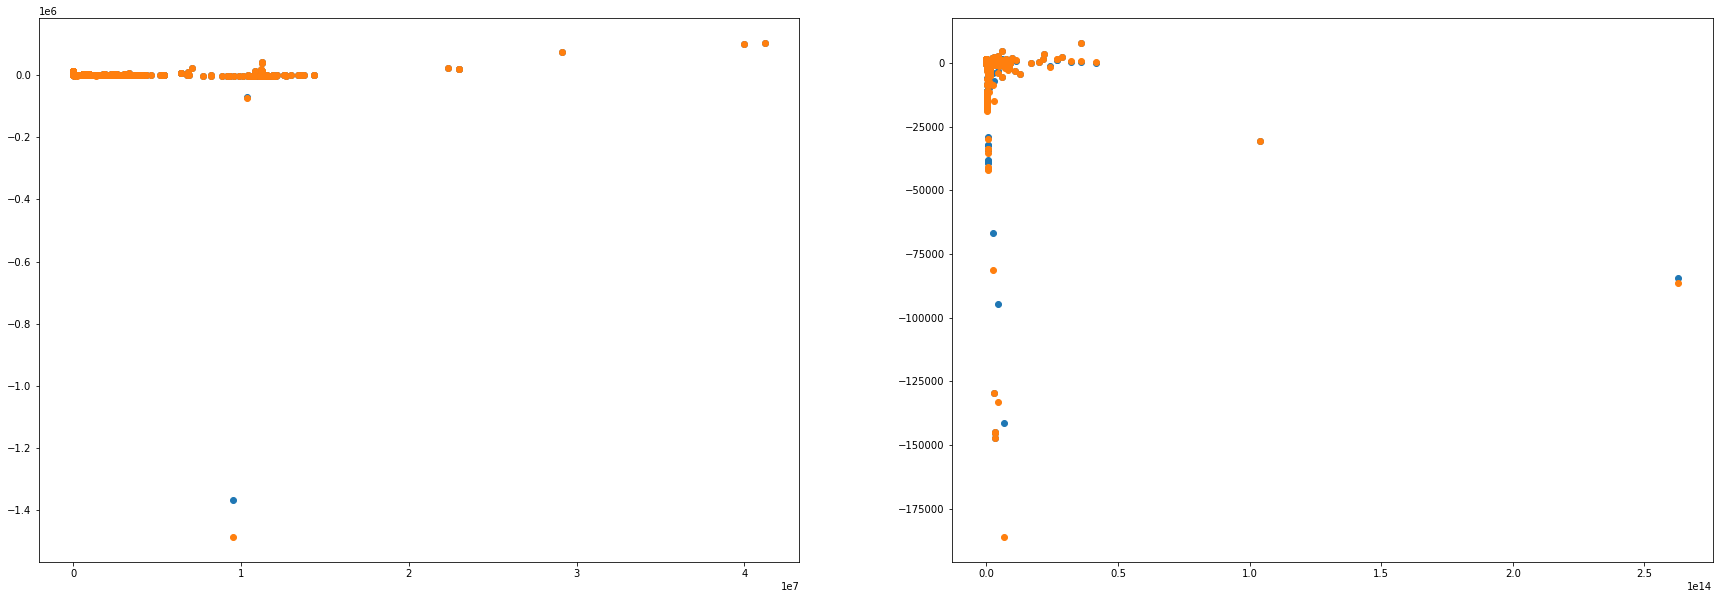

In [7]:
fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
axs[0].scatter(x=df_data.POSIX_STATS,y=df.POSIX_STATS)
axs[0].scatter(x=df_data.POSIX_STATS,y=df_dl.POSIX_STATS)
axs[1].scatter(x=df_data.POSIX_BYTES_WRITTEN,y=df.POSIX_BYTES_WRITTEN)
axs[1].scatter(x=df_data.POSIX_BYTES_WRITTEN,y=df_dl.POSIX_BYTES_WRITTEN)

In [21]:
df_diff["POSIX_OPENS"].sort_values(ascending=False).head()

29918    285.895186
2911     191.150387
65553    161.144860
59632    156.258284
80494    154.296758
Name: POSIX_OPENS, dtype: float64

In [34]:
df_data.iloc[29918]

Unnamed: 0                         29918
index                             437329
POSIX_OPENS                      3425147
POSIX_FILENOS                     -23524
POSIX_DUPS                        -23524
POSIX_READS                       777946
POSIX_WRITES                     5146393
POSIX_SEEKS                      1773706
POSIX_STATS                      6862054
POSIX_MMAPS                            0
POSIX_FSYNCS                           0
POSIX_RENAME_SOURCES              -23524
POSIX_RENAME_TARGETS              -23524
POSIX_MODE                       6623436
POSIX_BYTES_READ             11932947898
POSIX_BYTES_WRITTEN          11913972949
POSIX_MAX_BYTE_READ           3313166584
POSIX_MAX_BYTE_WRITTEN        4541405537
POSIX_CONSEC_READS                742661
POSIX_CONSEC_WRITES              1722928
POSIX_SEQ_READS                   742661
POSIX_SEQ_WRITES                 3414311
POSIX_RW_SWITCHES                  16800
POSIX_MEM_NOT_ALIGNED                  0
POSIX_MEM_ALIGNM

In [36]:
df.iloc[29918].POSIX_OPENS

-333.80568556977875

In [32]:
df_dl.iloc[29918].POSIX_OPENS

-47.9105

In [84]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,4999.500000,2886.895680,0.000000,2499.750000,4999.500000,7499.250000,9999.000000
POSIX_OPENS,10000.0,-11.479374,23.148323,-492.478152,-19.677123,-12.086118,-4.626800,269.004393
POSIX_FILENOS,10000.0,2.537756,3.122381,-22.079009,0.146714,1.642464,4.771763,48.567807
POSIX_DUPS,10000.0,2.586905,3.066911,-16.937769,0.157459,1.730451,4.964913,45.352974
POSIX_READS,10000.0,-0.876885,6.597008,-17.203592,-4.759181,-3.607125,0.110261,67.229743
POSIX_WRITES,10000.0,-0.092915,5.720806,-9.261403,-2.674532,-1.961574,-0.295324,32.588173
POSIX_SEEKS,10000.0,0.665835,8.688830,-7.552217,-4.068431,-2.700365,-0.101878,55.602418
POSIX_STATS,10000.0,3.419753,43.765593,-89.706655,-9.563671,-5.430700,1.950873,750.832816
POSIX_MMAPS,10000.0,0.954359,2.914927,-203.968266,0.681808,0.991076,1.361118,22.591555
POSIX_FSYNCS,10000.0,0.015032,1.589096,-4.680012,-0.075223,-0.036703,0.036149,83.213408


Compute distance to baseline per row. Baseline output is about 75, so be careful with the interpretation around ig_value of 0!

In [22]:
df.sum(axis=1).describe()

count    10000.000000
mean      4992.875766
std       2887.261195
min        -73.790314
25%       2494.294743
50%       4993.982059
75%       7477.957624
max      10199.159879
dtype: float64

In [23]:
df_dl.sum(axis=1).describe()

count    10000.000000
mean      4992.807180
std       2887.255782
min        -72.366381
25%       2494.381266
50%       4992.047513
75%       7478.721709
max      10203.415276
dtype: float64

In [14]:
df_data.nprocs

0           48
1           10
2           11
3         1024
4           42
          ... 
131887      16
131888      16
131889      32
131890      48
131891      80
Name: nprocs, Length: 131892, dtype: int64

In [15]:
df_data.index

RangeIndex(start=0, stop=131892, step=1)

In [9]:
df_data.head()

,Unnamed: 0,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,nprocs,POSIX_TOTAL_TIME
0,635941,4632,-697,-697,211180,31466,192276,14174,0,1,...,3140,100,0,0,0,0,0,-1,48,26.514707
1,438083,93,-10,-10,0,3840,60,3,0,0,...,0,0,0,0,0,3840,0,3,10,217.513259
2,409857,169,-26,-26,1559,1641,2635,480,0,0,...,396,2,0,0,0,0,0,0,11,0.252513
3,438447,1025,-1,-1,0,8,1,1,0,0,...,0,8,0,0,0,0,0,-1,1024,1.031402
4,601805,44102,-8736,-8736,3190571,1038080,1976335,157420,0,1,...,4672,1198,0,0,0,0,0,-1,42,104.239980


In [10]:
len(df_data)

131892

In [19]:
df_to_plot_nprocs.nprocs.unique()

array([   48,    10,    11,  1024,    42,    16,    32,    64,   304,
          80,    34,     1,   192,   112,     8,   128,     4,    96,
          39,    19,   512,    31,   256,   160,    24,   144,    51,
         625,     2,    28,   208,    21,   386,    40,  2000,    30,
          46,    27,  3200,   473,    38,    47,   655,    29,   865,
         224,   363,   481,     6,   359,  2048,    44,   554,   423,
          26,   470,    25,    37,   429,   800,   420,  2880,   622,
         721,    36,   576,   409,   561,    33,    41,   320,   392,
        4096,   100,    45,     5,   468,     3,    12,  4000,   686,
         101,    14,   484,   861,   414,  9600,  3000,   382,   676,
          43,  8192,   353,   400,   666,    72,   313,  1536,     9,
           7,   394,    61, 10240, 32768,   651,   351,  1824,  3072,
        1201,   768,   330,   482,   495,   493,    15,  1600,  1046,
         377,  4800,   560,  2400,   685,    22,  1176,    35,   273,
         437,   654,

- nprocs: only important if it gets really high.
- CONSEC_READS: if reads are consecutive, performance is better.
- CONSEC_WRITES: if writes are consecutive, performance is worse. Why??
- rank: in 56% of the entire dataset the rank is -1, so probably unknown

In [8]:
def plot_df_w_filter(df,filterexp,column,coord,color_column="POSIX_BYTES_READ"):
    df[filterexp].plot.scatter(x=df.column,y=df_data.column, ax=coord,
                                                 c=np.log10(df_no_outliers[filterexp].POSIX_BYTES_READ),colorbar=True)

In [9]:
def plot_mosaic(filter_spec):
    fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(30, 20))
    plot_df_w_filter(df_no_outliers,filter_spec,"nprocs",axs[0,0])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_READS",axs[0,1])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_CONSEC_READS",axs[0,2])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_WRITES",axs[1,0],"POSIX_BYTES_WRITTEN")
    df_no_outliers[filter_spec].plot.scatter(x="POSIX_BYTES_READ",y="POSIX_TOTAL_TIME",ax=axs[1,1])
    plt.show()

Text(0.5, 0, 'rank')

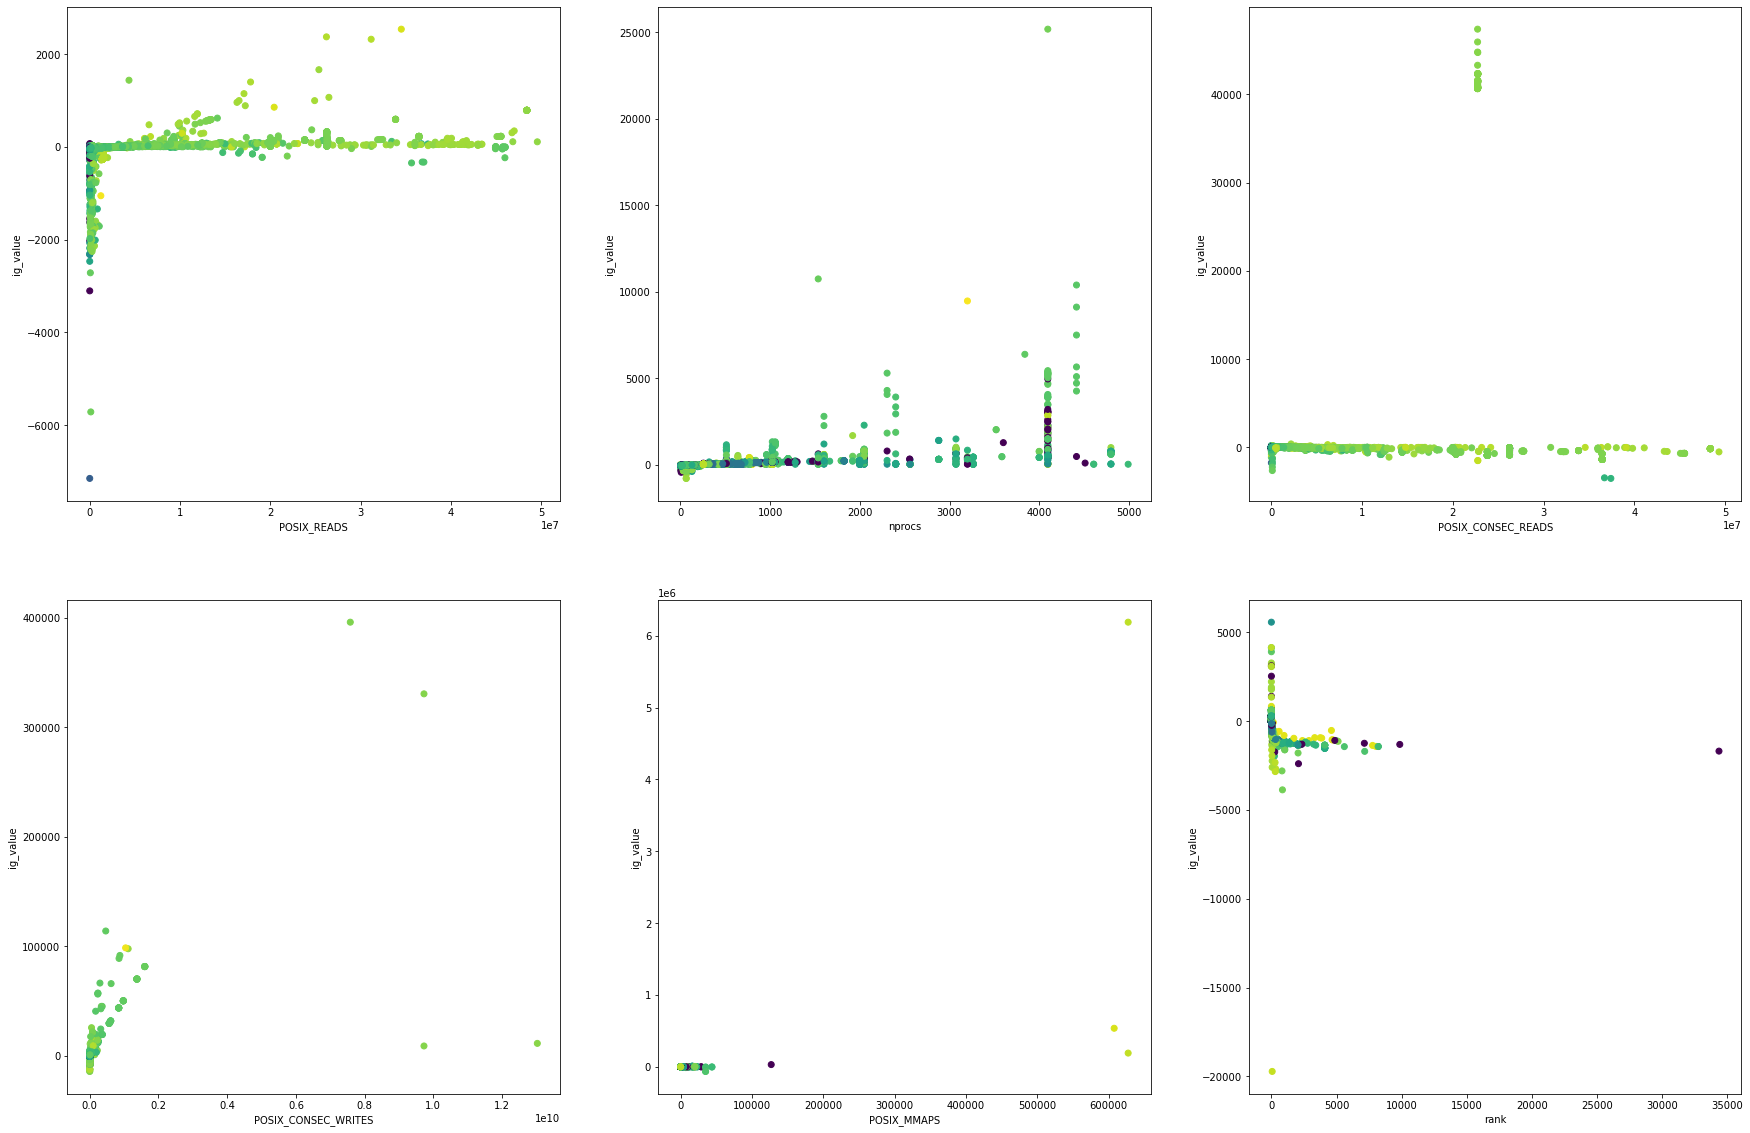

In [12]:
bytes_read_copy = df_data.POSIX_BYTES_READ.copy().where(df_data.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_data.POSIX_BYTES_WRITTEN.copy().where(df_data.POSIX_BYTES_WRITTEN > 0,0.1)
fig, axs = plt.subplots(nrows = 2, ncols=3, figsize=(30, 20))
[ax.set_ylabel("ig_value") for axs_x in axs for ax in axs_x]
reads_filter = df_data.POSIX_READS < 0.5e8
axs[0,0].scatter(x=df_data[reads_filter & (df.POSIX_READS < 5000)].POSIX_READS,y=df[reads_filter & (df.POSIX_READS < 5000)].POSIX_READS,c=np.log10(bytes_read_copy[reads_filter & (df.POSIX_READS < 5000)]))
axs[0,0].set_xlabel("POSIX_READS")
nprocs_filter = df_data.nprocs < 5000
axs[0,1].scatter(x=df_data[nprocs_filter].nprocs,y=df[nprocs_filter].nprocs,c=np.log10(bytes_read_copy[nprocs_filter]))
axs[0,1].set_xlabel("nprocs")
consec_reads_filter = df_data.POSIX_CONSEC_READS < 0.5e8
axs[0,2].scatter(x=df_data[consec_reads_filter].POSIX_CONSEC_READS,y=df[consec_reads_filter].POSIX_CONSEC_READS,c=np.log10(bytes_read_copy[consec_reads_filter]))
axs[0,2].set_xlabel("POSIX_CONSEC_READS")
axs[1,0].scatter(x=df_data.POSIX_CONSEC_WRITES,y=df.POSIX_CONSEC_WRITES,c=np.log10(bytes_written_copy))
axs[1,0].set_xlabel("POSIX_CONSEC_WRITES")
axs[1,1].scatter(x=df_data.POSIX_MMAPS,y=df.POSIX_MMAPS,c=np.log10(bytes_read_copy))
axs[1,1].set_xlabel("POSIX_MMAPS")
rank_filter = df_data["rank"] == -1
axs[1,2].scatter(x=df_data["rank"][rank_filter == False],y=df["rank"][rank_filter == False],c=np.log10(bytes_read_copy[rank_filter == False]))
axs[1,2].set_xlabel("rank")

<AxesSubplot:>

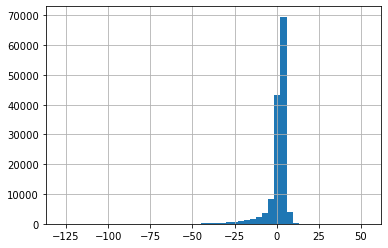

In [18]:
df.POSIX_CONSEC_READS.hist(bins=50)